# **BOOTCAMP @ GIKI (Content designed by Usama Arshad) WEEK 3**

---



Week 3: Day 13 - Foundations of CNNs

## Introduction to Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs) are a class of deep learning algorithms primarily used for image recognition and processing. CNNs are particularly effective for this task due to their ability to capture spatial hierarchies in images through their convolutional layers. Below are the foundational concepts of CNNs demonstrated with examples.

---

## Edge Detection using Sobel Operator

Edge detection is an image processing technique used to find the boundaries of objects within images. It works by detecting discontinuities in brightness. One common method for edge detection is the Sobel operator, which calculates the gradient of the image intensity at each pixel, highlighting regions of high spatial frequency that correspond to edges.
![Sobel Edge Detection](https://media5.datahacker.rs/2020/12/movie1-1-1.gif)

**Sobel Operator Kernels:**
- The Sobel operator uses two 3x3 kernels, one for detecting changes in the x direction (horizontal) and one for the y direction (vertical).

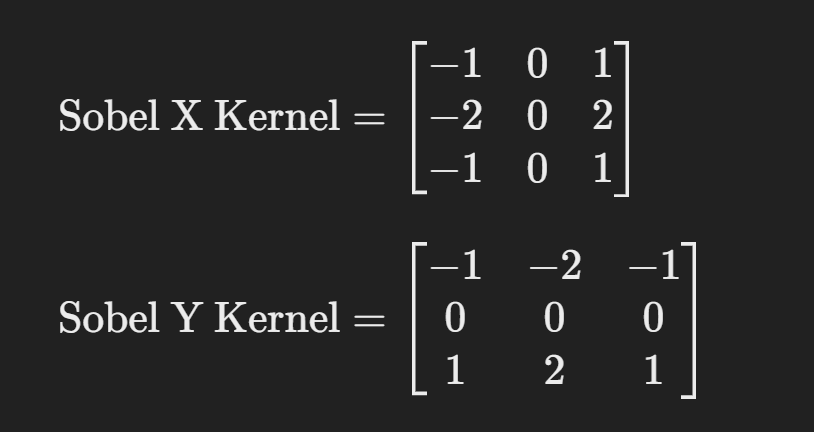

The output of applying the Sobel operator is the gradient magnitude, which gives the strength of the edges.

---

## Padding

Padding is a technique used to add extra pixels around the edges of an image. This is particularly useful when performing convolution operations as it helps to preserve the spatial dimensions of the input image. Without padding, the output of a convolution operation would be smaller than the input, which can be problematic for deep networks.
![Padding](https://miro.medium.com/v2/resize:fit:1400/1*O06nY1U7zoP4vE5AZEnxKA.gif)
**Types of Padding:**
- **Zero Padding:** Adding zero-value pixels around the edges of the image.
- **Same Padding:** Adding enough pixels around the edges so that the output size is the same as the input size.

---

## Strided Convolution

Strided convolution is a variant of the standard convolution operation where the filter is moved by more than one pixel at a time (the stride). This technique reduces the spatial dimensions of the output, which can help in reducing the computational load and controlling the size of the output.
![Strided Convolution](https://miro.medium.com/v2/resize:fit:1400/1*nD2LaAHzpJymgQnWOOo0VQ.gif)
**Key Points:**
- **Stride:** The number of pixels the filter moves over the input image.
- **Output Size:** The size of the output feature map is reduced by increasing the stride.

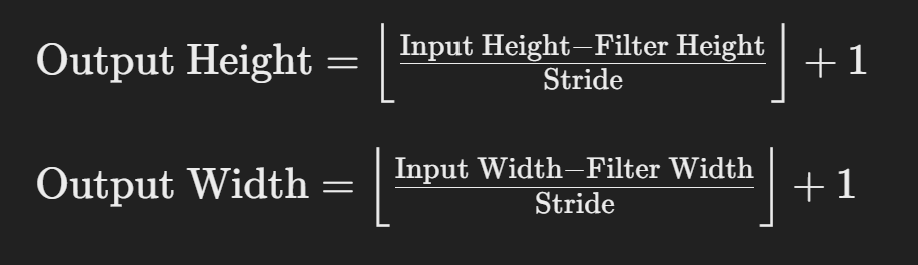

---

## Max Pooling

Max pooling is a down-sampling operation used to reduce the spatial dimensions of the input, which helps to reduce the computational complexity of the network. It works by sliding a window (typically 2x2) over the input and taking the maximum value within the window. This operation retains the most important features while discarding less important information.
![Max Pooling](https://miro.medium.com/v2/resize:fit:1400/1*gpkHl16U7ppl4-lBlnAYqw.gif)
**Key Points:**
- **Pool Size:** The dimensions of the pooling window.
- **Stride:** The number of pixels the pooling window moves over the input image.

---


In [ ]:
# Import necessary libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting images
import cv2  # For image processing
import ipywidgets as widgets  # For creating interactive widgets
from IPython.display import display  # For displaying widgets in Jupyter Notebook
from skimage import io  # For reading images
from io import BytesIO  # For handling byte streams

# Function to load and resize the image while maintaining aspect ratio
def load_image(file, max_size=128):
    # Read the image from the uploaded file
    image_stream = BytesIO(file['content'])
    img_color = io.imread(image_stream)
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

    # Calculate new dimensions to maintain aspect ratio
    h, w = img_color.shape[:2]
    if h > w:
        new_h = max_size
        new_w = int(max_size * (w / h))
    else:
        new_w = max_size
        new_h = int(max_size * (h / w))

    # Resize both color and grayscale images
    img_color = cv2.resize(img_color, (new_w, new_h))
    img_gray = cv2.resize(img_gray, (new_w, new_h))
    return img_color, img_gray

# Function to display color and grayscale images side by side
def display_images(img_color, img_gray, title='Images'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    # Display the color image
    axes[0].imshow(np.clip(img_color, 0, 255).astype(np.uint8))
    axes[0].set_title('Color Image')
    axes[0].axis('off')
    # Display the grayscale image
    axes[1].imshow(np.clip(img_gray, 0, 255).astype(np.uint8), cmap='gray')
    axes[1].set_title('Grayscale Image')
    axes[1].axis('off')
    plt.suptitle(title)
    plt.show()

# Function for edge detection using Sobel operator
def edge_detection(img, sobel_strength=1):
    # Define Sobel kernels
    sobel_x = np.array([[-sobel_strength, 0, sobel_strength],
                        [-2*sobel_strength, 0, 2*sobel_strength],
                        [-sobel_strength, 0, sobel_strength]])
    sobel_y = np.array([[-sobel_strength, -2*sobel_strength, -sobel_strength],
                        [0, 0, 0],
                        [sobel_strength, 2*sobel_strength, sobel_strength]])
    if len(img.shape) == 2:  # If the image is grayscale
        # Apply Sobel operator in both x and y directions
        edges_x = cv2.filter2D(img, -1, sobel_x)
        edges_y = cv2.filter2D(img, -1, sobel_y)
        # Calculate gradient magnitude
        edges = np.sqrt(edges_x**2 + edges_y**2)
        edges = (edges / edges.max() * 255).astype(np.uint8)
    else:  # If the image is color
        edges = np.zeros_like(img)
        # Apply Sobel operator on each channel separately
        for i in range(3):
            edges_x = cv2.filter2D(img[:, :, i], -1, sobel_x)
            edges_y = cv2.filter2D(img[:, :, i], -1, sobel_y)
            edges_channel = np.sqrt(edges_x**2 + edges_y**2)
            edges[:, :, i] = (edges_channel / edges_channel.max() * 255).astype(np.uint8)
    return edges

# Function to pad the image with zeros
def pad_image(img, padding=1):
    # Pad the image with zeros
    padded_img = np.pad(img, ((padding, padding), (padding, padding), (0, 0)), mode='constant', constant_values=0) if img.ndim == 3 else np.pad(img, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)
    return padded_img

# Function for strided convolution
def strided_convolution(img, kernel, stride=2):
    # Calculate the output shape
    output_shape = (
        (img.shape[0] - kernel.shape[0]) // stride + 1,
        (img.shape[1] - kernel.shape[1]) // stride + 1
    )
    if img.ndim == 3:  # If the image is color
        output_shape += (img.shape[2],)
        output = np.zeros(output_shape)
        # Apply convolution on each channel separately
        for i in range(3):
            for y in range(0, img.shape[0] - kernel.shape[0] + 1, stride):
                for x in range(0, img.shape[1] - kernel.shape[1] + 1, stride):
                    output[y // stride, x // stride, i] = np.sum(img[y:y + kernel.shape[0], x:x + kernel.shape[1], i] * kernel)
    else:  # If the image is grayscale
        output = np.zeros(output_shape)
        for y in range(0, img.shape[0] - kernel.shape[0] + 1, stride):
            for x in range(0, img.shape[1] - kernel.shape[1] + 1, stride):
                output[y // stride, x // stride] = np.sum(img[y:y + kernel.shape[0], x:x + kernel.shape[1]] * kernel)
    return output

# Function for max pooling
def max_pooling(img, pool_size=2, stride=2):
    # Calculate the output shape
    output_shape = (
        (img.shape[0] - pool_size) // stride + 1,
        (img.shape[1] - pool_size) // stride + 1
    )
    if img.ndim == 3:  # If the image is color
        output_shape += (img.shape[2],)
        output = np.zeros(output_shape)
        # Apply max pooling on each channel separately
        for i in range(3):
            for y in range(0, img.shape[0] - pool_size + 1, stride):
                for x in range(0, img.shape[1] - pool_size + 1, stride):
                    output[y // stride, x // stride, i] = np.max(img[y:y + pool_size, x:x + pool_size, i])
    else:  # If the image is grayscale
        output = np.zeros(output_shape)
        for y in range(0, img.shape[0] - pool_size + 1, stride):
            for x in range(0, img.shape[1] - pool_size + 1, stride):
                output[y // stride, x // stride] = np.max(img[y:y + pool_size, x:x + pool_size])
    return output

# Interactive UI for image processing
def interactive_ui():
    # Create a file upload widget
    file_upload = widgets.FileUpload(accept='image/*', multiple=False)
    display(file_upload)
    img_color = img_gray = None

    # Function to handle file upload change
    def on_upload_change(change):
        nonlocal img_color, img_gray
        # Load and display the uploaded image
        img_color, img_gray = load_image(file_upload.value[list(file_upload.value.keys())[0]])
        display_images(img_color, img_gray, 'Original Images')
        create_interactive_widgets()

    # Function to update the image based on selected operation and parameters
    def update_operation(operation, padding=1, stride=2, pool_size=2, sobel_strength=1):
        if img_gray is None or img_color is None:
            return

        # Perform the selected operation on the images
        if operation == 'Edge Detection':
            result_gray = edge_detection(img_gray, sobel_strength)
            result_color = edge_detection(img_color, sobel_strength)
            display_images(result_color, result_gray, f'Edge Detection (Sobel Strength={sobel_strength})')
        elif operation == 'Padding':
            result_gray = pad_image(img_gray, padding)
            result_color = pad_image(img_color, padding)
            display_images(result_color, result_gray, f'Padded Image (Padding={padding})')
        elif operation == 'Strided Convolution':
            kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  # Example kernel
            result_gray = strided_convolution(img_gray, kernel, stride)
            result_color = strided_convolution(img_color, kernel, stride)
            display_images(result_color, result_gray, f'Strided Convolution (Stride={stride})')
        elif operation == 'Max Pooling':
            result_gray = max_pooling(img_gray, pool_size, stride)
            result_color = max_pooling(img_color, pool_size, stride)
            display_images(result_color, result_gray, f'Max Pooling (Pool Size={pool_size}, Stride={stride})')

    # Function to create interactive widgets for selecting operation and parameters
    def create_interactive_widgets():
        # Dropdown for selecting operation
        operations = ['Edge Detection', 'Padding', 'Strided Convolution', 'Max Pooling']
        dropdown = widgets.Dropdown(options=operations, description='Operation:')
        # Sliders for adjusting parameters
        padding_slider = widgets.IntSlider(value=1, min=1, max=5, step=1, description='Padding:')
        stride_slider = widgets.IntSlider(value=2, min=1, max=5, step=1, description='Stride:')
        pool_size_slider = widgets.IntSlider(value=2, min=2, max=5, step=1, description='Pool Size:')
        sobel_strength_slider = widgets.IntSlider(value=1, min=1, max=5, step=1, description='Sobel Strength:')

        # Create a box for sliders
        sliders_box = widgets.VBox()

        # Function to update the sliders based on selected operation
        def update_widgets(operation):
            if operation == 'Edge Detection':
                sliders_box.children = [sobel_strength_slider]
            elif operation == 'Padding':
                sliders_box.children = [padding_slider]
            elif operation == 'Strided Convolution':
                sliders_box.children = [stride_slider]
            elif operation == 'Max Pooling':
                sliders_box.children = [pool_size_slider, stride_slider]

        # Observe changes in the dropdown and update sliders accordingly
        dropdown.observe(lambda change: update_widgets(change['new']), names='value')
        update_widgets('Edge Detection')  # Default display

        # Create interactive output
        ui = widgets.VBox([dropdown, sliders_box])
        out = widgets.interactive_output(update_operation, {
            'operation': dropdown,
            'padding': padding_slider,
            'stride': stride_slider,
            'pool_size': pool_size_slider,
            'sobel_strength': sobel_strength_slider
        })

        display(ui, out)

    # Observe changes in the file upload widget
    file_upload.observe(on_upload_change, names='value')

interactive_ui()


FileUpload(value={}, accept='image/*', description='Upload')

## Common Image Filters and Their Actions

Image filters are used in various image processing tasks to enhance, detect, or transform features in an image. Below are some of the most commonly used filters and their actions.

---

### 1. Identity Filter

**Action:** Leaves the image unchanged.

**Kernel:**

\[ \begin{bmatrix} 0 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0 \end{bmatrix} \]

**Application:** Used for testing or when no change is required.

---

### 2. Edge Detection Filters

**Action:** Detects edges by highlighting areas with high intensity changes.

**Sobel Filter:**
\[ \text{Sobel X Kernel} = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix} \]
\[ \text{Sobel Y Kernel} = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix} \]

**Laplacian Filter:**
\[ \begin{bmatrix} 0 & -1 & 0 \\ -1 & 4 & -1 \\ 0 & -1 & 0 \end{bmatrix} \]

**Application:** Used in edge detection tasks such as finding object boundaries.


---

### 3. Sharpening Filter

**Action:** Enhances the edges by increasing the contrast between adjacent pixels.

**Kernel:**

\[ \begin{bmatrix} 0 & -1 & 0 \\ -1 & 5 & -1 \\ 0 & -1 & 0 \end{bmatrix} \]

**Application:** Used to sharpen blurry images.

---

### 4. Box Blur (Average Filter)

**Action:** Smooths the image by averaging the pixel values within a neighborhood.

**Kernel:**

\[ \begin{bmatrix} \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \end{bmatrix} \]

**Application:** Used to reduce noise and detail.


---

### 5. Gaussian Blur

**Action:** Smooths the image using a Gaussian function.

**Kernel (example 3x3):**

\[ \begin{bmatrix} \frac{1}{16} & \frac{2}{16} & \frac{1}{16} \\ \frac{2}{16} & \frac{4}{16} & \frac{2}{16} \\ \frac{1}{16} & \frac{2}{16} & \frac{1}{16} \end{bmatrix} \]

**Application:** Used to reduce noise and detail, often in pre-processing steps.


---

### 6. Median Filter

**Action:** Reduces noise by replacing each pixel with the median value of the neighboring pixels.

**Application:** Used to remove "salt and pepper" noise.


---

### 7. Emboss Filter

**Action:** Highlights edges and gives the image a 3D shadow effect.

**Kernel:**

\[ \begin{bmatrix} -2 & -1 & 0 \\ -1 & 1 & 1 \\ 0 & 1 & 2 \end{bmatrix} \]

**Application:** Used to create artistic effects.


---

### 8. High-Pass Filter

**Action:** Retains high-frequency details and removes low-frequency components.

**Kernel:**

\[ \begin{bmatrix} -1 & -1 & -1 \\ -1 & 8 & -1 \\ -1 & -1 & -1 \end{bmatrix} \]

**Application:** Used in image sharpening and edge detection.



---

### 9. Low-Pass Filter

**Action:** Retains low-frequency components and removes high-frequency details (smoothing effect).

**Kernel:**

\[ \begin{bmatrix} \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \end{bmatrix} \]

**Application:** Used for noise reduction and image blurring.

---

### Summary

Different filters serve various purposes in image processing, such as enhancing features, reducing noise, detecting edges, and creating artistic effects. Understanding the function and application of each filter helps in selecting the right one for a specific task.


Of course! Below is the detailed theoretical explanation for each step of the CNN implementation, formatted for inclusion in your Google Colab notebook:

---

## Convolutional Neural Networks (CNNs) for Image Classification

Convolutional Neural Networks (CNNs) are a class of deep learning algorithms specifically designed for processing structured grid data, such as images. In this tutorial, we will implement a basic CNN using the MNIST dataset, which consists of handwritten digits. We will visualize the outputs and predictions to understand the performance of our model.

---



![Max Pooling](https://media.licdn.com/dms/image/D5612AQGOui8XZUZJSA/article-cover_image-shrink_720_1280/0/1680532048475?e=2147483647&v=beta&t=8aodfukDSrrnnxOVSNobKYJtbtSDB7yC83LUky-Ob68)

### Step 1: Import Libraries

First, we import the necessary libraries for data manipulation, visualization, and building the CNN model. These libraries include:
- **NumPy**: For numerical operations.
- **Matplotlib**: For plotting graphs and images.
- **TensorFlow**: For building and training deep learning models.
- **Keras**: A high-level API within TensorFlow for building and training deep learning models.

---

### Step 2: Load and Preprocess Dataset

We load the MNIST dataset, which includes both training and testing sets. The dataset consists of 60,000 training images and 10,000 testing images of handwritten digits.

**Preprocessing Steps:**
- **Reshape Data**: The MNIST images are 28x28 pixels, but we need to reshape them to include a channel dimension, resulting in a shape of (28, 28, 1).
- **Normalize Data**: Normalize the pixel values to the range [0, 1] to improve the convergence rate of the model during training.
- **One-Hot Encode Labels**: Convert the integer labels to one-hot encoded vectors for categorical classification. For example, the digit 3 will be converted to the vector [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

---

### Step 3: Build the CNN Model

We build a sequential CNN model composed of the following layers:

**Layers in the CNN Model:**
- **Conv2D Layer**: This layer applies a convolution operation to the input image, using a set of learnable filters to produce feature maps. The number of filters and the size of the filters are hyperparameters that can be adjusted.
- **MaxPooling2D Layer**: This layer performs down-sampling (i.e., reduces the spatial dimensions) by taking the maximum value over a window (e.g., 2x2) to reduce computational complexity and control overfitting.
- **Dropout Layer**: This regularization layer randomly sets a fraction of input units to 0 during training, which helps prevent overfitting.
- **Flatten Layer**: This layer flattens the input from the convolutional layers into a 1D vector, which can be fed into fully connected layers.
- **Dense Layer**: These are fully connected layers where each neuron is connected to every neuron in the previous layer. They are typically used for classification tasks.

---

### Step 4: Compile the Model

We compile the model by specifying the following:
- **Optimizer**: The optimization algorithm used to minimize the loss function. In this case, we use the Adam optimizer, which is an efficient and adaptive learning rate optimizer.
- **Loss Function**: The objective function that the model aims to minimize. For multi-class classification tasks, categorical cross-entropy is commonly used.
- **Metrics**: Metrics used to evaluate the performance of the model. Accuracy is a common metric for classification tasks.

---

### Step 5: Train the Model

We train the model using the training data and validate it using the testing data. Key parameters include:
- **Epochs**: The number of times the entire training dataset is passed through the network.
- **Batch Size**: The number of samples per gradient update.
- **Verbose**: The verbosity mode, which controls the amount of information displayed during training.

During training, the model learns to adjust its weights to minimize the loss function. Validation data helps monitor the model's performance on unseen data and prevent overfitting.

---

### Step 6: Evaluate the Model

After training, we evaluate the model on the test set to determine its performance. The evaluation provides metrics such as test loss and test accuracy, which indicate how well the model generalizes to new data.

---

### Step 7: Visualize Training History

We visualize the training history to understand the model's performance over epochs. Key plots include:
- **Training and Validation Accuracy**: Shows how the accuracy changes over epochs for both training and validation datasets.
- **Training and Validation Loss**: Shows how the loss changes over epochs for both training and validation datasets.

These plots help identify issues such as overfitting or underfitting and provide insights into the model's learning process.

---

### Step 8: Visualize Predictions

We visualize the model's predictions on the test set to understand its performance qualitatively. By displaying a few test images along with their true labels and predicted labels, we can see how well the model performs on individual samples.

This step involves:
- Making predictions on the test set.
- Displaying the test images with true and predicted labels.
- Analyzing the correct and incorrect predictions to understand the model's strengths and weaknesses.

---


![MNIST](https://miro.medium.com/v2/resize:fit:1000/1*63sGPbvLLpvlD16hG1bvmA.gif)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
300/300 - 50s - loss: 0.4392 - accuracy: 0.8605 - val_loss: 0.0899 - val_accuracy: 0.9709 - 50s/epoch - 165ms/step
Epoch 2/10
300/300 - 48s - loss: 0.1377 - accuracy: 0.9585 - val_loss: 0.0519 - val_accuracy: 0.9828 - 48s/epoch - 160ms/step
Epoch 3/10
300/300 - 47s - loss: 0.1017 - accuracy: 0.9693 - val_loss: 0.0435 - val_accuracy: 0.9851 - 47s/epoch - 158ms/step
Epoch 4/10
300/300 - 51s - loss: 0.0850 - accuracy: 0.9747 - val_loss: 0.0399 - val_accuracy: 0.9863 - 51s/epoch - 171ms/step
Epoch 5/10
300/300 - 47s - loss: 0.0734 - accuracy: 0.9781 - val_loss: 0.0312 - val_accuracy: 0.9891 - 47s/epoch - 157ms/step
Epoch 6/10
300/300 - 48s - loss: 0.0658 - accuracy: 0.9800 - val_loss: 0.0298 - val_accuracy: 0.9891 - 48s/epoch - 161ms/step
Epoch 7/10
300/300 - 47s - loss: 0.0605 - accuracy: 0.9819 - val_loss: 0.0268 - val_accuracy: 0.9905 - 47s/epoch - 158ms/step
Epoch 8/10
300/300 - 49s - loss: 0.0551 - accuracy: 0

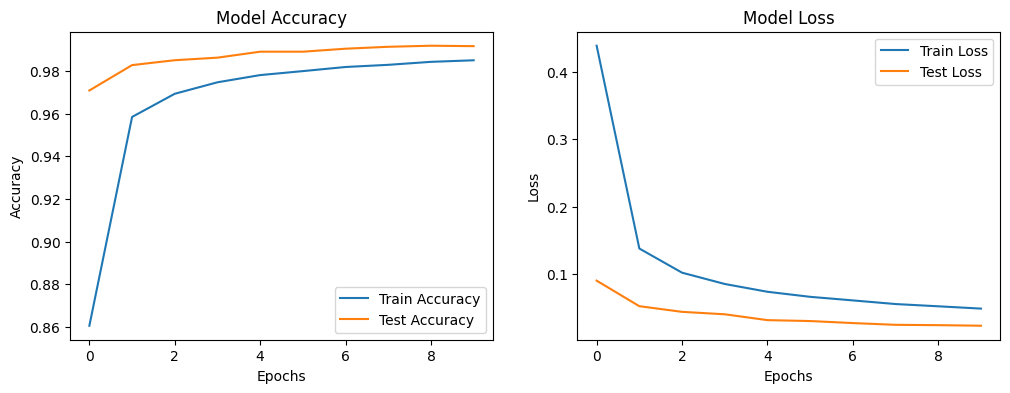

313/313 [==============================] - 3s 8ms/step


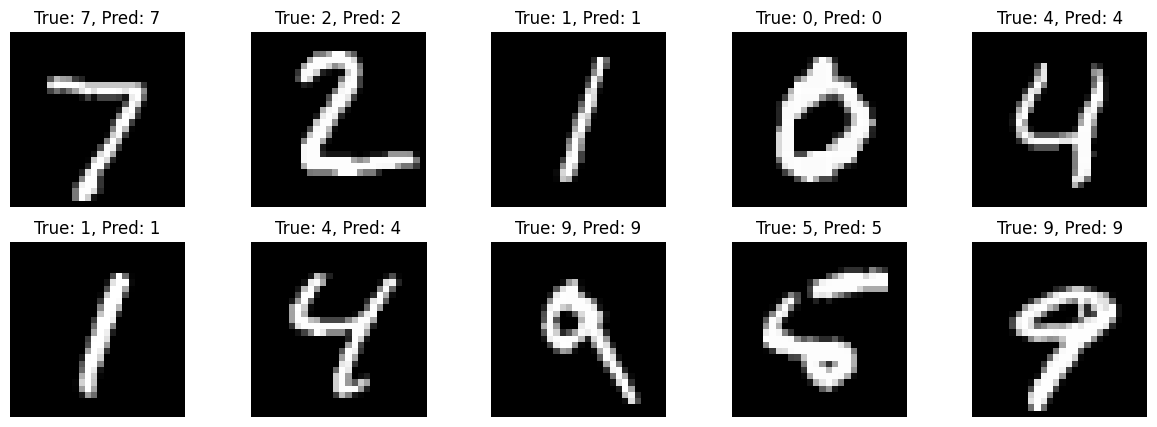

In [ ]:
# Import necessary libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs and images
import tensorflow as tf  # For building and training deep learning models
from tensorflow.keras.models import Sequential  # For creating a sequential model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # For adding various layers to the model
from tensorflow.keras.datasets import mnist  # For loading the MNIST dataset
from tensorflow.keras.utils import to_categorical  # For one-hot encoding the labels

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()  # Load the dataset

# Reshape the data to include the channel dimension (28x28x1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')  # Reshape training data
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')  # Reshape testing data

# Normalize the data to the range [0, 1]
X_train /= 255  # Normalize training data
X_test /= 255  # Normalize testing data

# One-hot encode the labels
y_train = to_categorical(y_train, 10)  # One-hot encode training labels
y_test = to_categorical(y_test, 10)  # One-hot encode testing labels

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D(pool_size=(2, 2)),  # First pooling layer
    Dropout(0.25),  # Dropout layer to prevent overfitting
    Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Second convolutional layer
    MaxPooling2D(pool_size=(2, 2)),  # Second pooling layer
    Dropout(0.25),  # Dropout layer to prevent overfitting
    Flatten(),  # Flatten the 2D arrays into a 1D vector
    Dense(128, activation='relu'),  # Fully connected dense layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(10, activation='softmax')  # Output layer with softmax activation for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)  # Train the model

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)  # Evaluate the model on the test data
print(f'Test loss: {score[0]}')  # Print test loss
print(f'Test accuracy: {score[1]}')  # Print test accuracy

# Visualize training history
plt.figure(figsize=(12, 4))  # Set the figure size

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)  # Create subplot for accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Test Accuracy')  # Plot testing accuracy
plt.title('Model Accuracy')  # Set title
plt.xlabel('Epochs')  # Set x-axis label
plt.ylabel('Accuracy')  # Set y-axis label
plt.legend()  # Display legend

# Plot training & validation loss values
plt.subplot(1, 2, 2)  # Create subplot for loss
plt.plot(history.history['loss'], label='Train Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Test Loss')  # Plot testing loss
plt.title('Model Loss')  # Set title
plt.xlabel('Epochs')  # Set x-axis label
plt.ylabel('Loss')  # Set y-axis label
plt.legend()  # Display legend

plt.show()  # Show the plots

# Visualize predictions
def visualize_predictions(model, X_test, y_test, num_samples=10):
    predictions = model.predict(X_test)  # Get predictions for the test data
    plt.figure(figsize=(15, 5))  # Set the figure size
    for i in range(num_samples):
        plt.subplot(2, 5, i+1)  # Create subplot for each sample
        plt.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Show the test image
        plt.title(f"True: {np.argmax(y_test[i])}, Pred: {np.argmax(predictions[i])}")  # Set title with true and predicted labels
        plt.axis('off')  # Hide the axes
    plt.show()  # Show the plots

visualize_predictions(model, X_test, y_test, num_samples=10)  # Visualize the predictions
